In [14]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [47]:
df = pd.read_csv("Diwali Sales Data.csv",encoding = 'unicode_escape')

In [49]:
df.shape

(11251, 15)

In [50]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [52]:
df.drop(['Status','unnamed1'], axis=1,inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [55]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [64]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [68]:
df['Amount'] = df['Amount'].astype('int')

In [72]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9453.609901
std,12.754122,1.115047,5219.569169
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


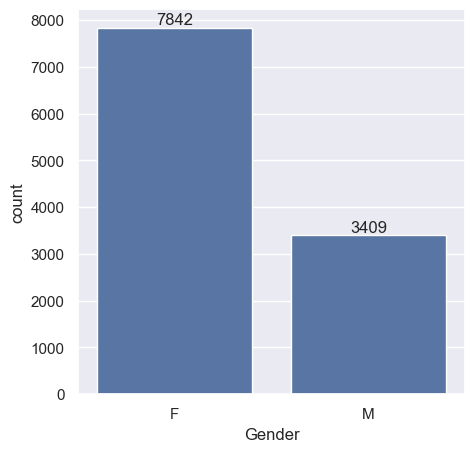

In [87]:
ax = sns.countplot(x = 'Gender', data = df)
sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

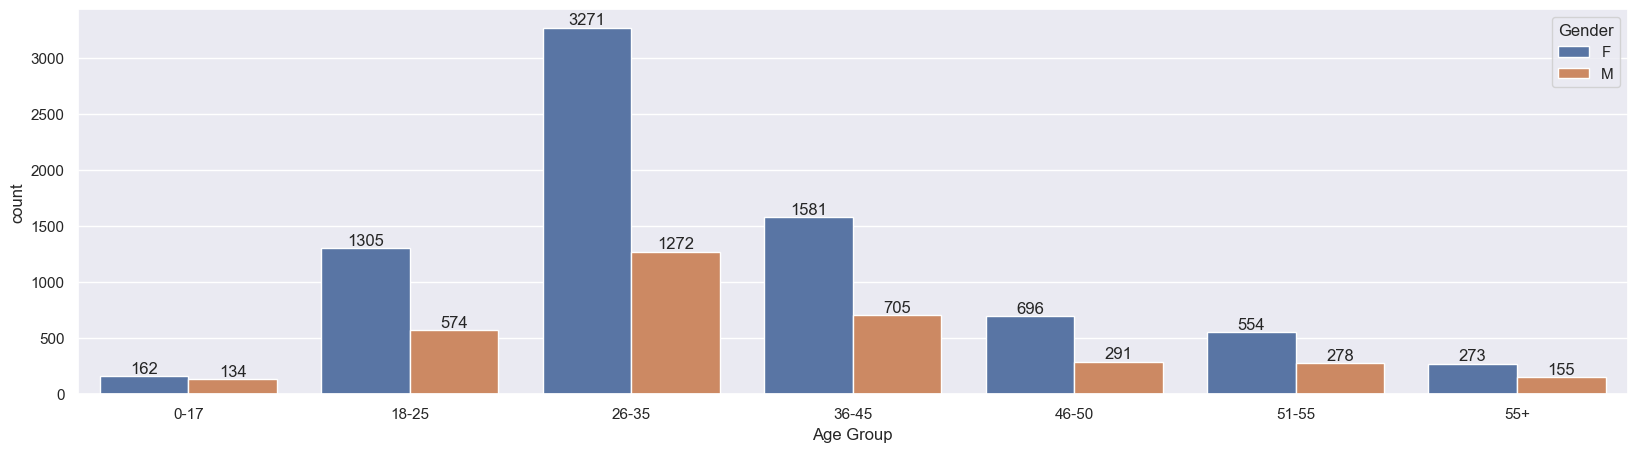

In [79]:
df['Age Group'] = pd.Categorical(df['Age Group'], categories=df['Age Group'].unique().sort(), ordered=True)
    
# Create the countplot
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='State', ylabel='Orders'>

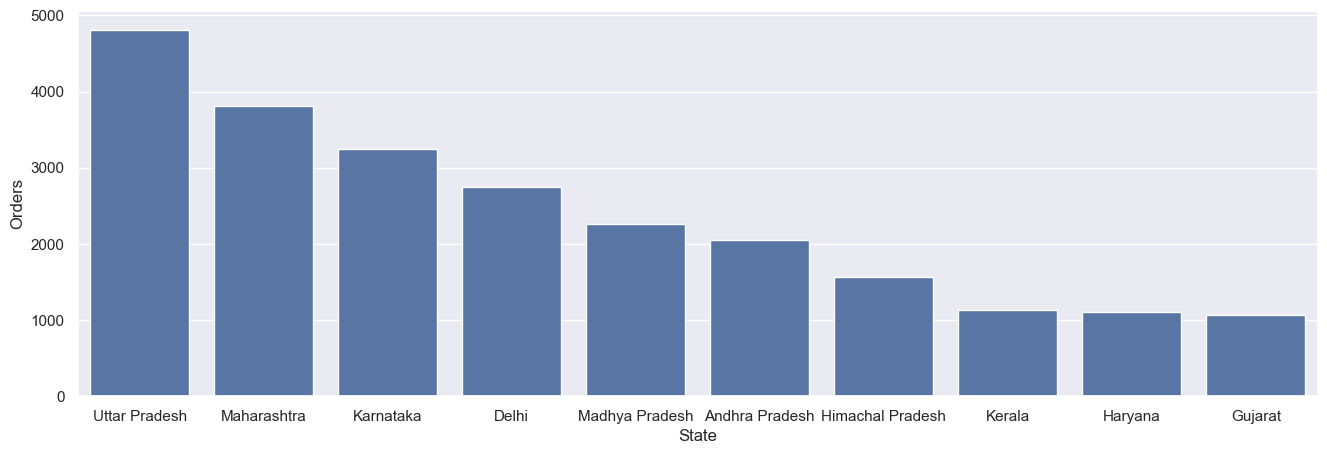

In [81]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_state,x = 'State', y='Orders')


<Axes: xlabel='State', ylabel='Amount'>

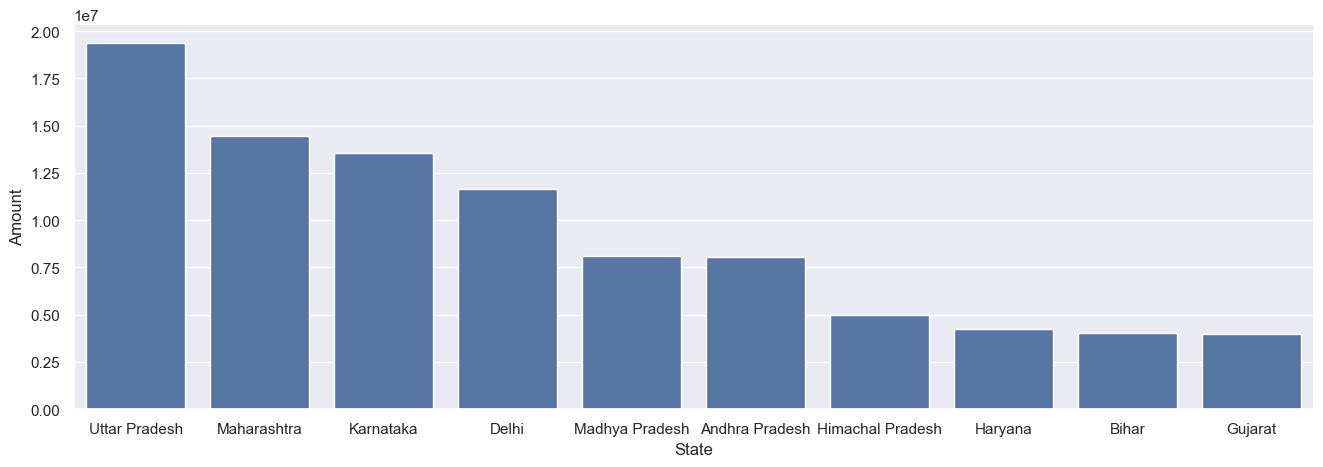

In [82]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_state,x = 'State', y='Amount')

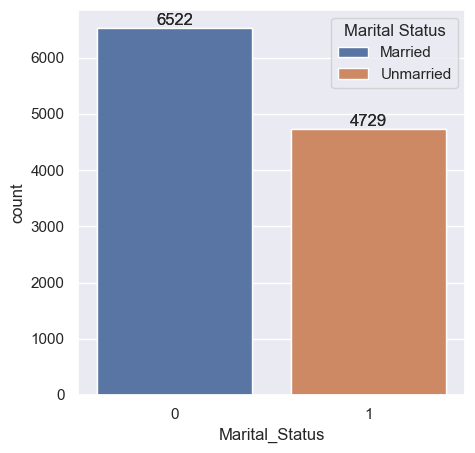

In [91]:
# Create a dictionary to map numerical values to labels
marital_status_labels = {0: 'Married', 1: 'Unmarried'}

# Create the countplot
ax = sns.countplot(data = df, x = 'Marital_Status', hue='Marital_Status')

# Set the hue order to match the dictionary
sns.countplot(data = df, x = 'Marital_Status', hue='Marital_Status', hue_order=[0, 1])

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

# Set the legend labels
ax.legend(title='Marital Status', labels=['Married', 'Unmarried'])

# Set the figure size
sns.set(rc={'figure.figsize':(5,5)})

<Axes: xlabel='Marital_Status', ylabel='Amount'>

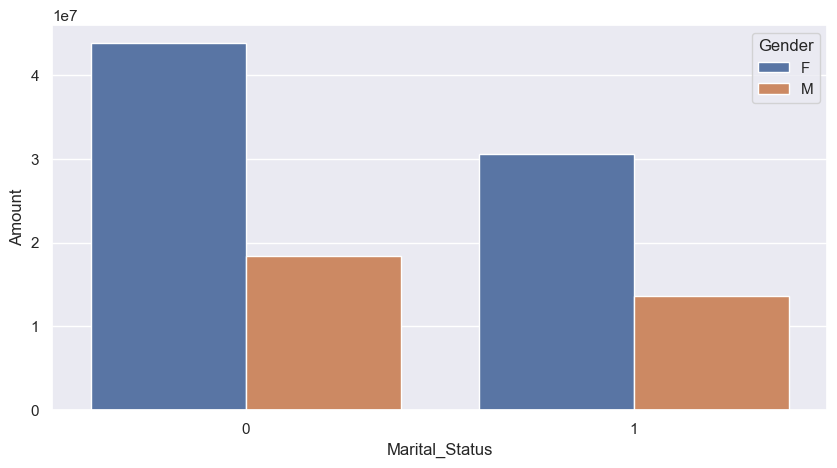

In [93]:
sales_state = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data=sales_state,x = 'Marital_Status', y='Amount',hue='Gender')

<Axes: xlabel='Occupation', ylabel='Amount'>

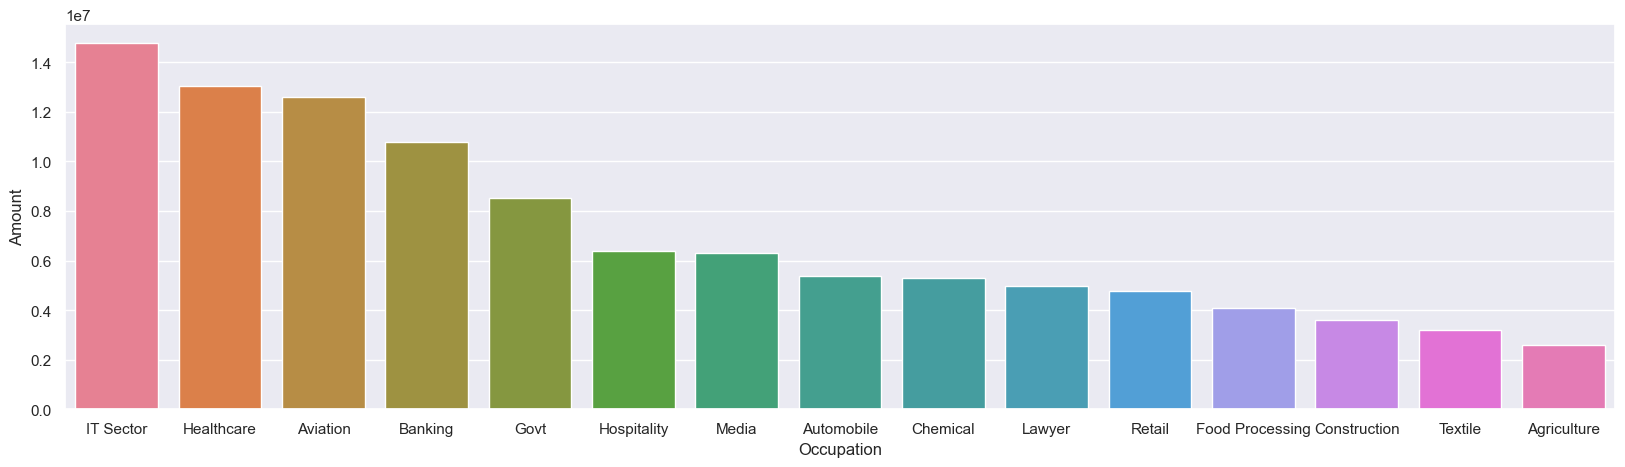

In [98]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x = 'Occupation',y='Amount',hue='Occupation')

<Axes: xlabel='Product_Category', ylabel='Amount'>

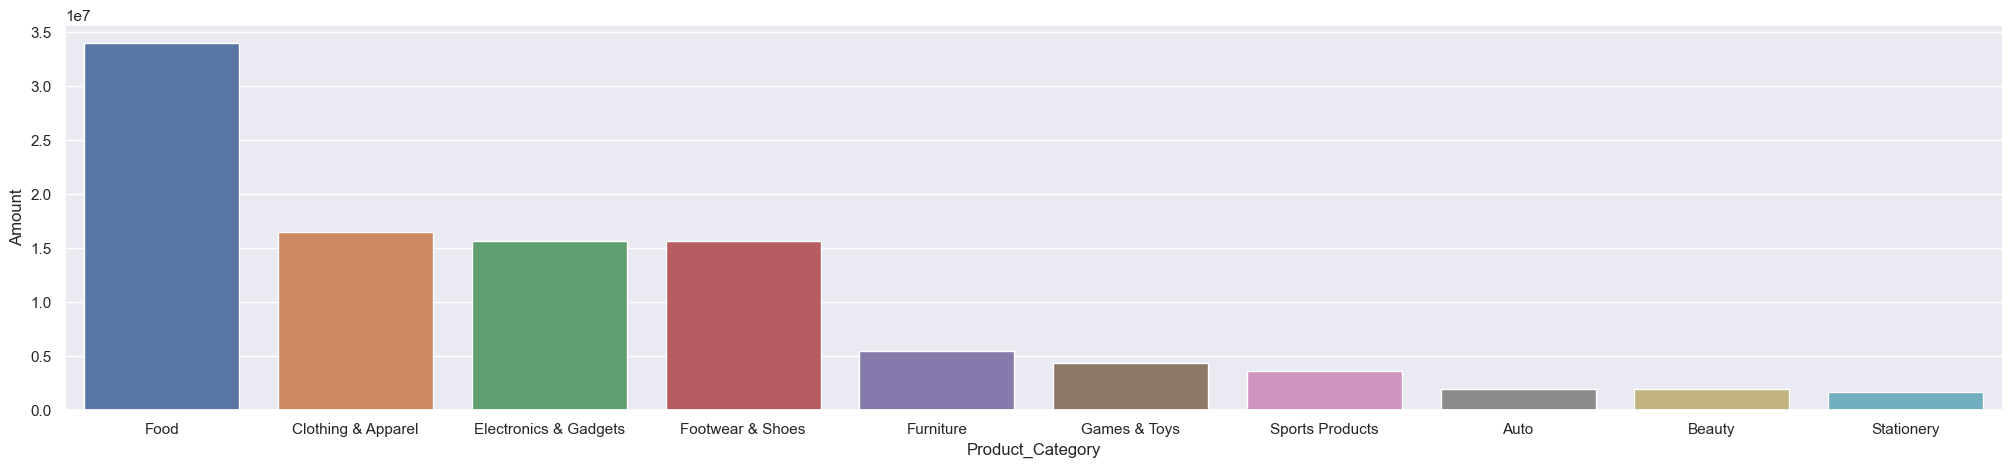

In [107]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=sales_state,x = 'Product_Category',y='Amount',hue='Product_Category')

<Axes: xlabel='Product_ID', ylabel='Orders'>

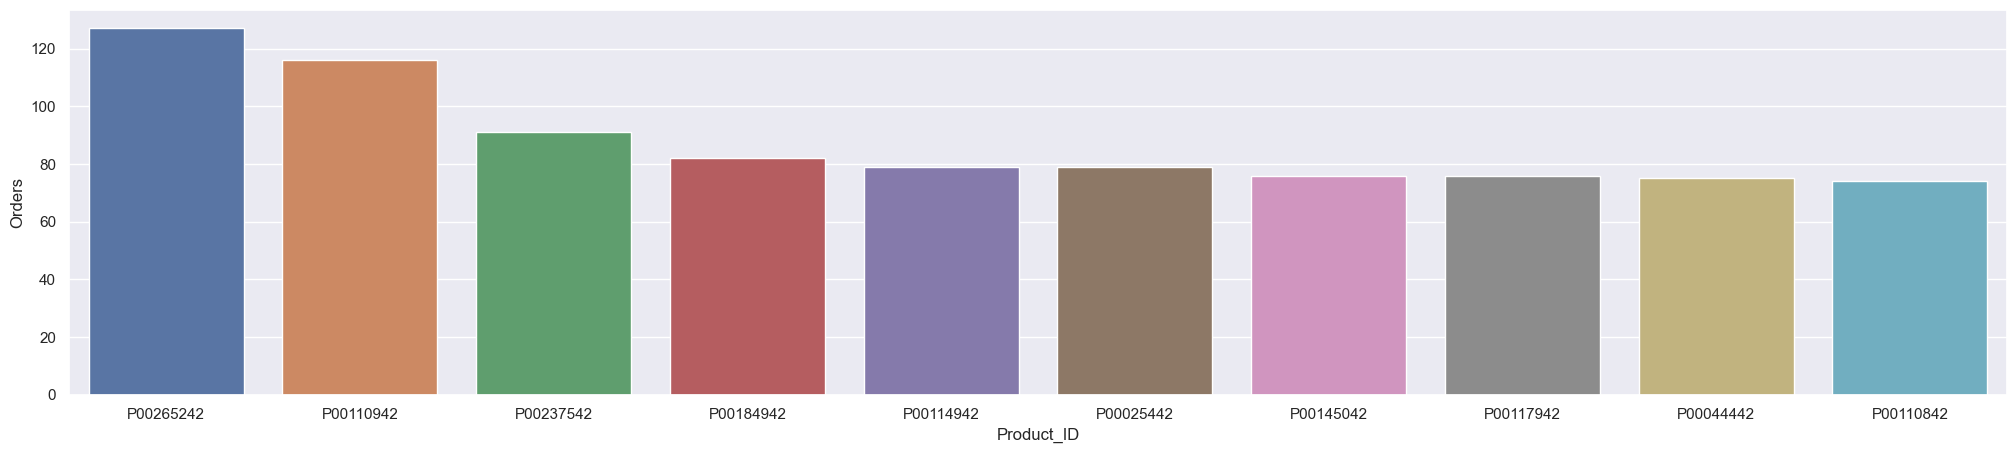

In [108]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=sales_state,x = 'Product_ID',y='Orders',hue='Product_ID')